In [1]:
# train_dataset을 불러오고 싶은 경우
from datasets import (
    Dataset,
    load_from_disk,
    concatenate_datasets,
)

org_dataset = load_from_disk("/opt/ml/input/data/train_dataset")
dataset = concatenate_datasets(
    [
        org_dataset["train"].flatten_indices(),
        org_dataset["validation"].flatten_indices(),
    ]
) # train dev 를 합친 4192 개 질문에 대해 모두 테스트

print(dataset)

Loading cached processed dataset at /opt/ml/input/data/train_dataset/train/cache-5864ec783ab77348.arrow
Loading cached processed dataset at /opt/ml/input/data/train_dataset/validation/cache-ec5c6075463087d0.arrow


Dataset({
    features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
    num_rows: 4192
})


In [15]:
tokenizer_eda_answer = []

for data in dataset:
    tokenized_question = len(data['answers']['text'][0])
    tokenizer_eda_answer.append([data['answers']['text'][0], tokenized_question])
    

In [17]:
from pandas import DataFrame

In [18]:
df_question = DataFrame(tokenizer_eda_answer, columns=['answer', 'len'])

In [19]:
df_question

,answer,len
0,하원,2
1,《경영의 실제》,8
2,백성,2
3,중국,2
4,4개,2
...,...,...
4187,제 양왕,4
4188,'일곱 개의 신전 광장',13
4189,미나미 지로,6
4190,"200,000명",8


In [20]:
df_question['len'].describe()

count    4192.000000
mean        6.311546
std         5.445750
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        83.000000
Name: len, dtype: float64

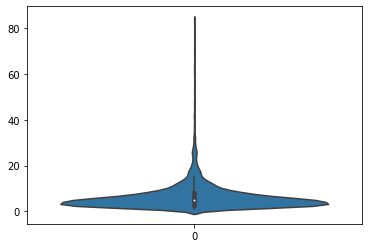

In [25]:
import seaborn as sns
ax = sns.violinplot(data=df_question['len'])